## K-means 

K-means clustering is a popular unsupervised machine learning algorithm used for grouping similar data points into k - clusters. Goal: to partition a given dataset into k (predefined) clusters.

The k-means algorithm works by first randomly initializing k cluster centers, one for each cluster. Each data point in the dataset is then assigned to the nearest cluster center based on their distance. The distance metric used is typically Euclidean distance, but other distance measures such as Manhattan distance or cosine similarity can also be used.

After all the data points have been assigned to a cluster, the algorithm calculates the new mean for each cluster by taking the average of all the data points assigned to that cluster. These new means become the new cluster centers. The algorithm then repeats the assignment and mean calculation steps until the cluster assignments no longer change or until a maximum number of iterations is reached.

The final output of the k-means algorithm is a set of k clusters, where each cluster contains the data points that are most similar to each other based on the distance metric used. The algorithm is commonly used in various fields such as image segmentation, market segmentation, and customer profiling.


```
Initialize:
- K: number of clusters
- Data: the input dataset
- Randomly select K initial centroids

Repeat:
- Assign each data point to the nearest centroid (based on Euclidean distance)
- Calculate the mean of each cluster to update its centroid
- Check if the centroids have converged (i.e., they no longer change)

Until:
- The centroids have converged
- The maximum number of iterations has been reached

Output:
- The final K clusters and their corresponding centroids
```


## Code 
Here's an implementation of k-means clustering algorithm in Python from scratch:

In [1]:
import numpy as np

class KMeans:
    def __init__(self, k, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations
        
    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(range(len(X)), self.k, replace=False)]
        
        for i in range(self.max_iterations):
            # Assign each data point to the nearest centroid
            cluster_assignments = []
            for j in range(len(X)):
                distances = np.linalg.norm(X[j] - self.centroids, axis=1)
                cluster_assignments.append(np.argmin(distances))
            
            # Update centroids
            for k in range(self.k):
                cluster_data_points = X[np.where(np.array(cluster_assignments) == k)]
                if len(cluster_data_points) > 0:
                    self.centroids[k] = np.mean(cluster_data_points, axis=0)
            
            # Check for convergence
            if i > 0 and np.array_equal(self.centroids, previous_centroids):
                break
            
            # Update previous centroids
            previous_centroids = np.copy(self.centroids)
        
        # Store the final cluster assignments
        self.cluster_assignments = cluster_assignments
    
    def predict(self, X):
        # Assign each data point to the nearest centroid
        cluster_assignments = []
        for j in range(len(X)):
            distances = np.linalg.norm(X[j] - self.centroids, axis=1)
            cluster_assignments.append(np.argmin(distances))
        
        return cluster_assignments

The KMeans class has an __init__ method that takes the number of clusters (k) and the maximum number of iterations to run (max_iterations). The fit method takes the input dataset (X) and runs the k-means clustering algorithm. The predict method takes a new dataset (X) and returns the cluster assignments for each data point based on the centroids learned during training.

Note that this implementation assumes that the input dataset X is a NumPy array with each row representing a single data point and each column representing a feature. The algorithm also uses Euclidean distance to calculate the distances between data points and centroids.


### Test 

In [2]:

x1 = np.random.randn(5,2) + 5
x2 = np.random.randn(5,2) - 5
X = np.concatenate([x1,x2], axis=0)

# Initialize the KMeans object with k=3
kmeans = KMeans(k=2)

# Fit the k-means model to the dataset
kmeans.fit(X)

# Get the cluster assignments for the input dataset
cluster_assignments = kmeans.predict(X)

# Print the cluster assignments
print(cluster_assignments)

# Print the learned centroids
print(kmeans.centroids)

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[[-5.53443211 -5.13920695]
 [ 4.46522152  5.04931144]]


### Visualize

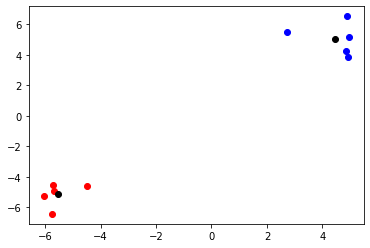

In [4]:
from matplotlib import pyplot as plt
# Plot the data points with different colors based on their cluster assignments
colors = ['r', 'b']
for i in range(kmeans.k):
    plt.scatter(X[np.where(np.array(cluster_assignments) == i)][:,0], 
                X[np.where(np.array(cluster_assignments) == i)][:,1], 
                color=colors[i])

# Plot the centroids as black circles
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], color='black', marker='o')

# Show the plot
plt.show()

### Optimization 
Here are some ways to optimize the k-means clustering algorithm:

Random initialization of centroids: Instead of initializing the centroids using the first k data points, we can randomly initialize them to improve the convergence of the algorithm. This can be done by selecting k random data points from the input dataset as the initial centroids.

Early stopping: We can stop the k-means algorithm if the cluster assignments and centroids do not change after a certain number of iterations. This helps to avoid unnecessary computation.

Vectorization: We can use numpy arrays and vectorized operations to speed up the computation. This avoids the need for loops and makes the code more efficient.

Here's an optimized version of the k-means clustering algorithm that implements these optimizations:

In [5]:
import numpy as np

class KMeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
    
    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        
        # Iterate until convergence or maximum number of iterations is reached
        for i in range(self.max_iters):
            # Assign each data point to the closest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            cluster_assignments = np.argmin(distances, axis=1)
            
            # Update the centroids based on the new cluster assignments
            new_centroids = np.array([np.mean(X[np.where(cluster_assignments == j)], axis=0) 
                                      for j in range(self.k)])
            
            # Check for convergence
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break
                
            self.centroids = new_centroids
    
    def predict(self, X):
        # Assign each data point to the closest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        cluster_assignments = np.argmin(distances, axis=1)
        
        return cluster_assignments


This optimized version initializes the centroids randomly, uses vectorized operations for computing distances and updating the centroids, and checks for convergence after each iteration to stop the algorithm if it has converged.

Follow ups:

* Computattional complexity: O(it * knd)
* Improve space: use index instead of copy
* Improve time: 
  * dim reduction
  * subsample (cons?)
* mini-batch
* k-median https://mmuratarat.github.io/2019-07-23/kmeans_from_scratch